In [506]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [507]:
df = pd.read_csv("/content/drive/My Drive/PythonP/Melbourne_housing_FULL.csv")
dfc = df.copy()

In [508]:
dfc.shape

(34857, 21)

In [509]:
dfc.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [510]:
dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [511]:
dfc.drop('Date', axis=1, inplace=True)

In [512]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom2       26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13742 non-null  float64
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Lattitude      26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

In [513]:
print("shape     :",dfc.shape)
print("size      :",dfc.size)
print("dimenion  :",dfc.ndim)

shape     : (34857, 20)
size      : 697140
dimenion  : 2


In [514]:
dfc.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [515]:
dfc.duplicated().sum()

37

In [516]:
dfc.loc[dfc.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2212,Brunswick,8/2 Pottery Ct,3,t,641000.0,SP,RW,5.2,3056.0,3.0,2.0,1.0,0.0,112.0,1900.0,Moreland City Council,-37.77030,144.95330,Northern Metropolitan,11918.0
2260,Brunswick,8/2 Pottery Ct,3,t,641000.0,SP,RW,5.2,3056.0,3.0,2.0,1.0,0.0,112.0,1900.0,Moreland City Council,-37.77030,144.95330,Northern Metropolitan,11918.0
2663,Camberwell,3/220 Warrigal Rd,2,u,435000.0,SP,LITTLE,7.8,3124.0,2.0,1.0,1.0,896.0,77.0,1960.0,Boroondara City Council,-37.84790,145.09580,Southern Metropolitan,8920.0
2690,Camberwell,3/220 Warrigal Rd,2,u,435000.0,SP,LITTLE,7.8,3124.0,2.0,1.0,1.0,896.0,77.0,1960.0,Boroondara City Council,-37.84790,145.09580,Southern Metropolitan,8920.0
4379,Footscray,4 Adelaide St,4,h,1225000.0,SP,Nelson,6.4,3011.0,4.0,2.0,1.0,319.0,130.0,1915.0,Maribyrnong City Council,-37.79430,144.88750,Western Metropolitan,7570.0
4484,Footscray,4 Adelaide St,4,h,1225000.0,SP,Nelson,6.4,3011.0,4.0,2.0,1.0,319.0,130.0,1915.0,Maribyrnong City Council,-37.79430,144.88750,Western Metropolitan,7570.0
5777,Kensington,106/80 Speakmen St,1,u,312000.0,SP,Edward,4.2,3031.0,NaN,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,5263.0
5833,Kensington,106/80 Speakmen St,1,u,312000.0,SP,Edward,4.2,3031.0,NaN,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Northern Metropolitan,5263.0
5877,Kew,2/27 Pakington St,2,u,610000.0,SP,Nelson,5.6,3101.0,2.0,1.0,1.0,745.0,72.0,1968.0,Boroondara City Council,-37.80240,145.03460,Southern Metropolitan,10331.0
6030,Kew,2/27 Pakington St,2,u,610000.0,SP,Nelson,5.6,3101.0,2.0,1.0,1.0,745.0,72.0,1968.0,Boroondara City Council,-37.80240,145.03460,Southern Metropolitan,10331.0


In [517]:
dfc.duplicated().sum()

37

In [518]:
dfc = dfc.drop_duplicates(subset=["Address","Lattitude","Longtitude"])

In [519]:
dfc.duplicated().sum()

0

In [520]:
dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34538.0,3.029909e+00,0.968689,1.00000,2.000000,3.00000,4.000,1.600000e+01
Price,27011.0,1.050244e+06,642072.967990,85000.00000,635000.000000,870000.00000,1295000.000,1.120000e+07
Distance,34537.0,1.119930e+01,6.799048,0.00000,6.400000,10.30000,14.000,4.810000e+01
Postcode,34537.0,3.116264e+03,109.219236,3000.00000,3051.000000,3103.00000,3156.000,3.978000e+03
Bedroom2,26416.0,3.083926e+00,0.979845,0.00000,2.000000,3.00000,4.000,3.000000e+01
Bathroom,26407.0,1.623774e+00,0.723786,0.00000,1.000000,2.00000,2.000,1.200000e+01
Car,25910.0,1.728406e+00,1.010497,0.00000,1.000000,2.00000,2.000,2.600000e+01
Landsize,22849.0,5.940943e+02,3412.675315,0.00000,224.000000,521.00000,670.000,4.330140e+05
BuildingArea,13608.0,1.602928e+02,403.145909,0.00000,102.000000,136.00000,187.000,4.451500e+04
YearBuilt,15403.0,1.965308e+03,37.316279,1196.00000,1940.000000,1970.00000,2000.000,2.106000e+03


In [521]:
dfc.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7527
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom2          8122
Bathroom          8131
Car               8628
Landsize         11689
BuildingArea     20930
YearBuilt        19135
CouncilArea          3
Lattitude         7883
Longtitude        7883
Regionname           3
Propertycount        3
dtype: int64

In [522]:
columns_to_fill = ['BuildingArea', 'Longtitude', 'YearBuilt', 'Lattitude', 'Bedroom2', "Bathroom", 'Landsize', 'Price', 'Car',"Distance", "Postcode", "CouncilArea", "Regionname", "Propertycount"]

for column in columns_to_fill:
    mode_value = dfc[column].mode().iloc[0]
    dfc.loc[dfc[column].isna(), column] = mode_value

In [523]:
dfc.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [524]:
dfc.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2866
Method               9
SellerG            382
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       738
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [525]:
dfc.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [526]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34538 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34538 non-null  object 
 1   Address        34538 non-null  object 
 2   Rooms          34538 non-null  int64  
 3   Type           34538 non-null  object 
 4   Price          34538 non-null  float64
 5   Method         34538 non-null  object 
 6   SellerG        34538 non-null  object 
 7   Distance       34538 non-null  float64
 8   Postcode       34538 non-null  float64
 9   Bedroom2       34538 non-null  float64
 10  Bathroom       34538 non-null  float64
 11  Car            34538 non-null  float64
 12  Landsize       34538 non-null  float64
 13  BuildingArea   34538 non-null  float64
 14  YearBuilt      34538 non-null  float64
 15  CouncilArea    34538 non-null  object 
 16  Lattitude      34538 non-null  float64
 17  Longtitude     34538 non-null  float64
 18  Region

In [527]:
cat_cols = ['Rooms', 'Type',"Method","Propertycount"]
num_cols = ['Suburb', 'Address',"Price", 'SellerG', 'Distance',\
            'Postcode', 'Bedroom2', 'Bathroom', 'Car','Landsize', 'BuildingArea',\
            'YearBuilt', 'CouncilArea', 'Lattitude','Longtitude',]

In [528]:
columns_to_convert = ['Suburb', 'Type', 'Method', 'SellerG',"Type","Address", "Regionname", "CouncilArea"]

In [529]:
for column in columns_to_convert:
    dfc[column] = dfc[column].astype('category')
    dfc[column] = dfc[column].cat.codes

In [530]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34538 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34538 non-null  int16  
 1   Address        34538 non-null  int32  
 2   Rooms          34538 non-null  int64  
 3   Type           34538 non-null  int8   
 4   Price          34538 non-null  float64
 5   Method         34538 non-null  int8   
 6   SellerG        34538 non-null  int16  
 7   Distance       34538 non-null  float64
 8   Postcode       34538 non-null  float64
 9   Bedroom2       34538 non-null  float64
 10  Bathroom       34538 non-null  float64
 11  Car            34538 non-null  float64
 12  Landsize       34538 non-null  float64
 13  BuildingArea   34538 non-null  float64
 14  YearBuilt      34538 non-null  float64
 15  CouncilArea    34538 non-null  int8   
 16  Lattitude      34538 non-null  float64
 17  Longtitude     34538 non-null  float64
 18  Region

In [531]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[col_name].quantile(low_quantile)
    Q3 = df[col_name].quantile(up_quantile)
    z = ( df[col_name] - df[col_name].mean() ) / df[col_name].std()
    low_limit = Q1 - 1.5 * z
    up_limit = Q3 + 1.5 * z
    return low_limit, up_limit

In [532]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [533]:
for col in dfc:
    print(col, check_outlier(dfc, col))

Suburb True
Address True
Rooms True
Type True
Price True
Method True
SellerG True
Distance True
Postcode True
Bedroom2 True
Bathroom True
Car True
Landsize True
BuildingArea True
YearBuilt True
CouncilArea True
Lattitude True
Longtitude True
Regionname True
Propertycount True


Text(0, 0.5, 'Frequency')

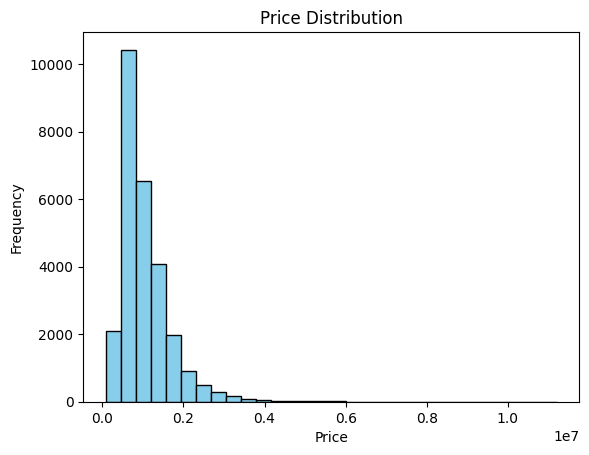

In [534]:
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

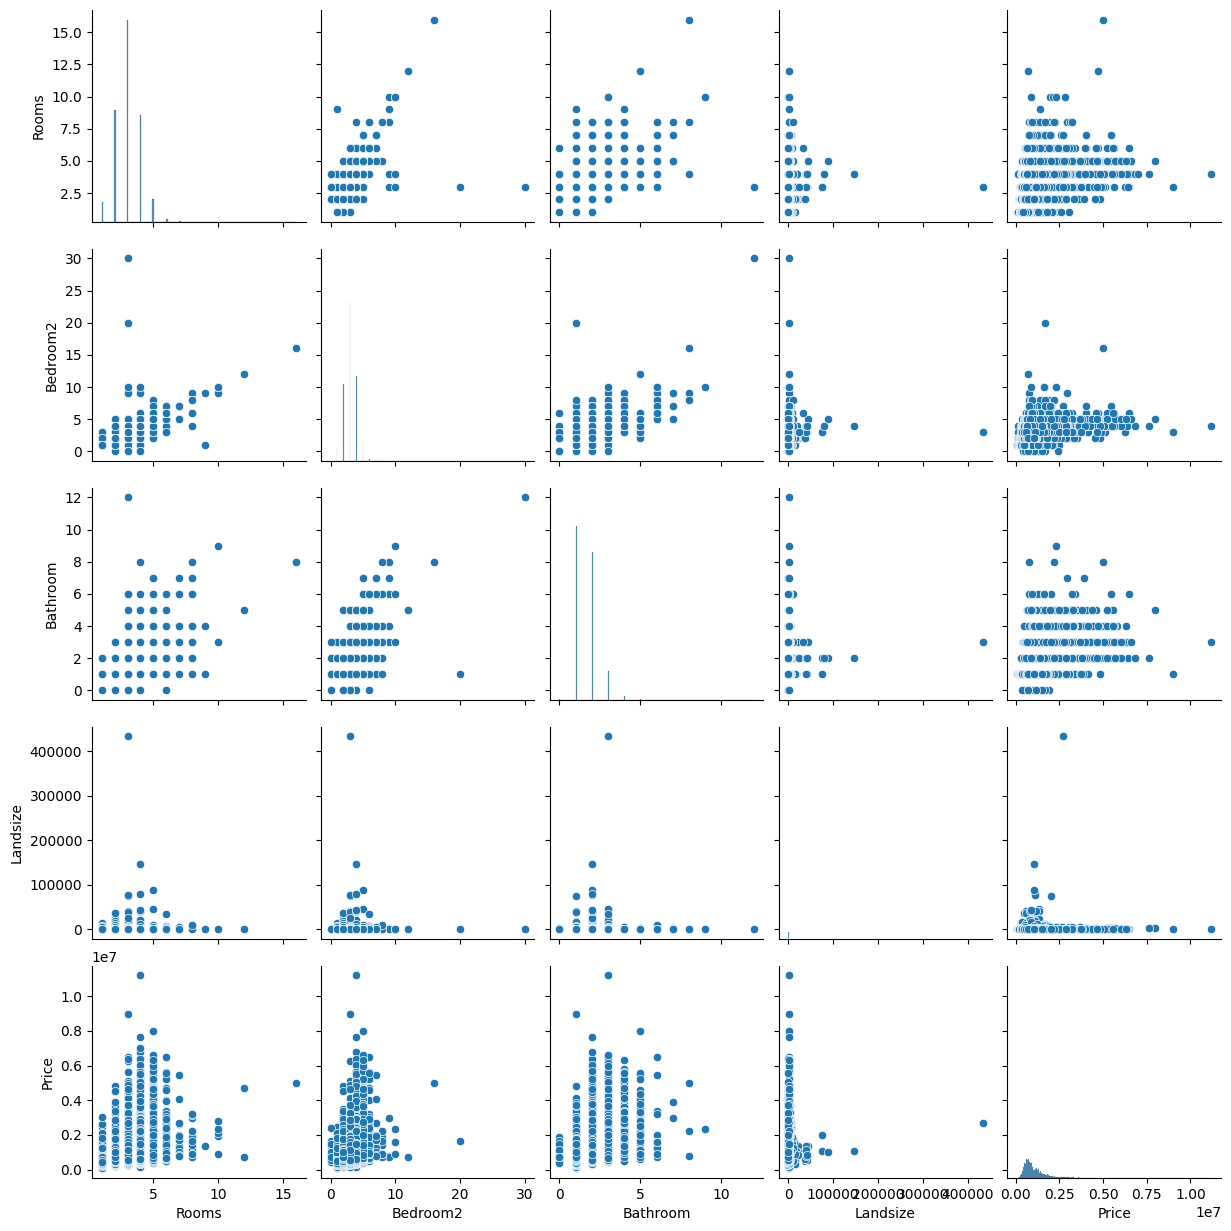

In [497]:
vars_to_plot = ['Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Price']
sns.pairplot(df[vars_to_plot])
plt.show()

<Axes: >

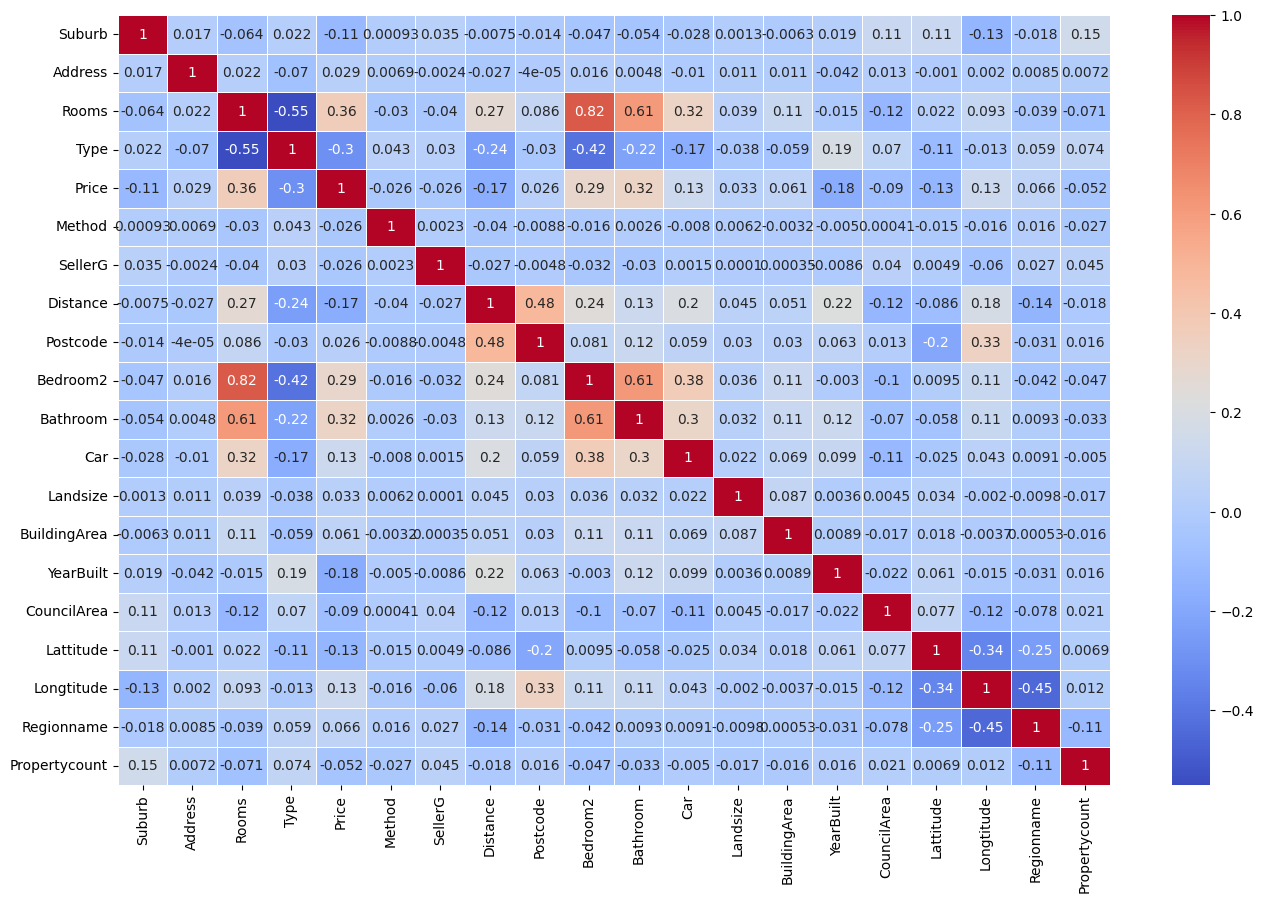

In [498]:
plt.figure(figsize=(16, 10))
sns.heatmap(dfc.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [499]:
dfc.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,600000.0,6,155,2.5,3067.0,2.0,1.0,1.0,126.0,120.0,1970.0,31,-37.8014,144.9958,2,4019.0
1,0,32512,2,0,1480000.0,2,33,2.5,3067.0,2.0,1.0,1.0,202.0,120.0,1970.0,31,-37.7996,144.9984,2,4019.0
2,0,15389,2,0,1035000.0,2,33,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
3,0,9768,3,2,600000.0,7,294,2.5,3067.0,3.0,2.0,1.0,0.0,120.0,1970.0,31,-37.8114,145.0116,2,4019.0
4,0,25128,3,0,1465000.0,5,33,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0


In [500]:
label_encoder = LabelEncoder()
for col in cat_cols:
    dfc[col] = label_encoder.fit_transform(dfc[col])

In [501]:
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=drop_first)
    return dataframe
ohe_cols = [col for col in dfc.columns if 12 >= dfc[col].nunique() > 2]
dfc = one_hot_encoder(dfc, ohe_cols, drop_first=True)

In [502]:
y = dfc["Price"]
X = dfc.drop("Price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [503]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (27630, 52)
Shape of x_test is (6908, 52)
Shape of y_train is (27630,)
Shape of y_test is (6908,)


In [504]:
models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)}
}


In [536]:
for model_name, model_params in models.items():
    model = model_params['model']

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    print(f"{model_name}: Mean Squared Error \n= {mse}")

  # çok güzel gözükmedi ama işlevi daha önemli :)

Lasso: Mean Squared Error 
= 215666797450.66583
LinearRegression: Mean Squared Error 
= 215651794191.8232
Ridge: Mean Squared Error 
= 215517385896.6556
ElasticNet: Mean Squared Error 
= 253516566411.6449
KNeighborsRegressor: Mean Squared Error 
= 332817179384.6328
RandomForestRegressor: Mean Squared Error 
= 182480470125.84033
GradientBoostingRegressor: Mean Squared Error 
= 191651487548.93933
AdaBoostRegressor: Mean Squared Error 
= 262579193725.14093


In [505]:
# Berat Hamança